In [19]:
!pip install pandas matplotlib seaborn openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import os

# Load data
file_name = 'student_performance_100.xlsx'
file_path = f'/content/{file_name}'

# Check if the file exists. If not, prompt the user to upload it.
if not os.path.exists(file_path):
    print(f"File '{file_name}' not found at {file_path}.")
    print("Please upload the file now. Make sure the uploaded file is named 'student_performance_100.xlsx'.")
    uploaded = files.upload()
    if file_name not in uploaded:
        print(f"Error: The file '{file_name}' was not found among the uploaded files. Please ensure you upload the correct file with the exact name.")
        df = pd.DataFrame() # Initialize an empty DataFrame to prevent further errors
    else:
        print(f"'{file_name}' uploaded successfully.")
        try:
            df = pd.read_excel(file_path)
            print("Data loaded from uploaded file.")
        except Exception as e:
            print(f"An error occurred while reading the uploaded Excel file: {e}")
            df = pd.DataFrame()
else:
    print(f"File '{file_name}' found. Loading data...")
    try:
        df = pd.read_excel(file_path)
        print("Data loaded successfully.")
    except Exception as e:
        print(f"An error occurred while reading the Excel file from '{file_path}': {e}")
        df = pd.DataFrame()

df.head()

File 'student_performance_100.xlsx' not found at /content/student_performance_100.xlsx.
Please upload the file now. Make sure the uploaded file is named 'student_performance_100.xlsx'.


Saving student_performance_100.xlsx to student_performance_100.xlsx
'student_performance_100.xlsx' uploaded successfully.
Data loaded from uploaded file.


,Student ID,Gender,Ethnicity,Parental Education,Test Preparation,Math Score,Reading Score,Writing Score,Attendance
0,S001,Male,Group A,Bachelor's Degree,Completed,43,68,68,89
1,S002,Female,Group E,Associate's Degree,Completed,66,75,54,87
2,S003,Male,Group E,Some College,Completed,58,59,89,98
3,S004,Male,Group C,Associate's Degree,NaN,49,52,54,87
4,S005,Female,Group E,High School,NaN,45,54,35,67


Total marks and Average

In [21]:
subject_cols = ['Math Score', 'Reading Score', 'Writing Score'] # Corrected column names

df['Total'] = df[subject_cols].sum(axis=1)
df['Average'] = df[subject_cols].mean(axis=1)

Pass/fail based on Average

In [22]:
PASS_MARK = 40

df['Result'] = df['Average'].apply(lambda x: 'Pass' if x >= PASS_MARK else 'Fail')

pass_counts = df['Result'].value_counts()
pass_counts


,count
Result,
Pass,100


plot pass-fail

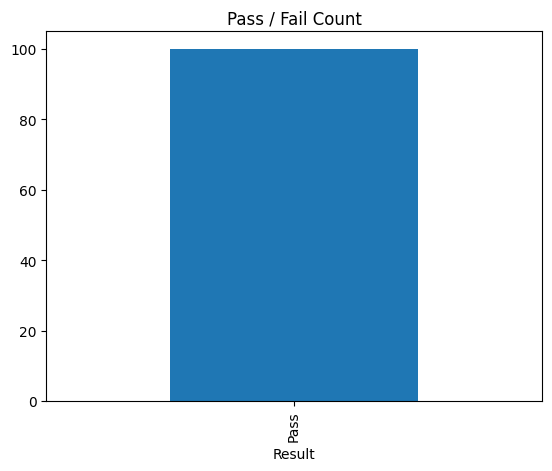

In [23]:
pass_counts.plot(kind='bar')
plt.title('Pass / Fail Count')
plt.show()


Subject Wise Performance

In [24]:
subject_avg = df[subject_cols].mean()
print("Subject-wise average:")
print(subject_avg)


Subject-wise average:
Math Score       62.51
Reading Score    60.49
Writing Score    60.53
dtype: float64


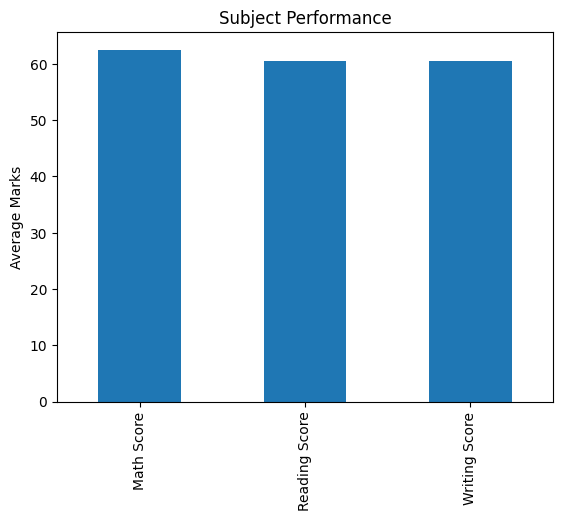

In [25]:
subject_avg.plot(kind='bar')
plt.title("Subject Performance")
plt.ylabel("Average Marks")
plt.show()


Attendance Impact Correlation

In [26]:
# correlation between attendance and total marks
correlation = df['Attendance'].corr(df['Total'])
print("Attendance vs Performance correlation:", correlation)


Attendance vs Performance correlation: 0.41856637188802137


Scatter Plot

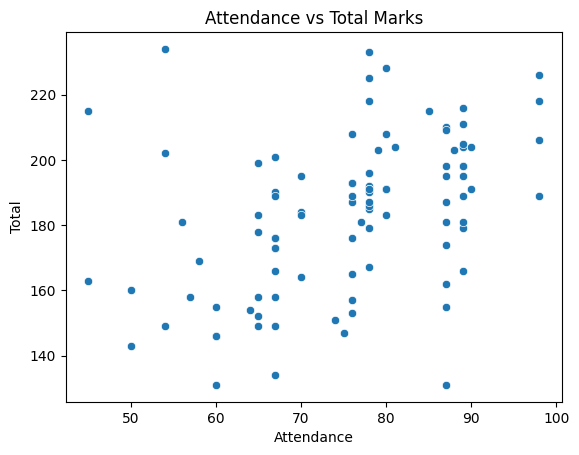

In [27]:
sns.scatterplot(data=df, x='Attendance', y='Total')
plt.title("Attendance vs Total Marks")
plt.show()


Summary Report

In [28]:
print("\n=== SUMMARY REPORT ===")
print("Total Students:", len(df))
print("Pass Count:", pass_counts.get('Pass',0))
print("Fail Count:", pass_counts.get('Fail',0))
print("\nSubject Averages:")
print(subject_avg)
print("\nAttendance Correlation:", correlation)



=== SUMMARY REPORT ===
Total Students: 100
Pass Count: 100
Fail Count: 0

Subject Averages:
Math Score       62.51
Reading Score    60.49
Writing Score    60.53
dtype: float64

Attendance Correlation: 0.41856637188802137
